In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import pandas_ta as ta
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
from datetime import datetime, timedelta
sys.path.insert(1, '/home/krystian/Repos/XTB-Trader/utility')
sys.path.insert(1, '/home/krystian/Repos/XTB-Trader')
from XTBClient.api import XTBClient, PERIOD
from utility import utility 

In [4]:
def get_data_for_symbol(symbol):
    c = XTBClient()
    c.login(os.environ.get("XTB_user_num"), os.environ.get("XTB_pass"))
    df = c.get_candles_in_range(symbol, PERIOD.FIFTEEN_MINUTES.value, start=datetime.now() - timedelta(days=365))
    c.logout()
    
    df = df.reset_index()
    df.rename(columns={"timestamp": "date"}, inplace=True)
    
    df['date'] = df['date'].apply(pd.to_datetime)
    df.set_index('date',inplace=True)
    # df.drop([col for col in df.columns if col != "close"], axis=1, inplace=True)
    return df

In [5]:
def import_csv(name):
    df = pd.read_csv(name, sep=';')
    df.columns = ["date","open","high","low","close", "volume"]
    df.date = pd.to_datetime(df.date)
    df.drop(columns="volume", inplace=True)
    df.set_index('date', inplace=True, drop=True)
    return df

In [6]:
def save_model(model, filename):
    return pickle.dump(model, open(os.path.join("../", "models", "main_model.pkl"), 'wb'))

In [7]:
def load_model(filename):
    return pickle.load(open(os.path.join("../", "models", "main_model.pkl"), 'rb'))

In [8]:
def trend_accuracy(real, preds):
    df = pd.DataFrame({"real": real, "preds": preds})
    return len(df[df.real * df.preds > 0]) / len(df)

# Data import

In [21]:
# df = yf.download(tickers = 'EURUSD=x', period='1y', interval='15m')
df = get_data_for_symbol("EURUSD")
df.index.rename("Date", inplace=True)
df.rename(columns={col: col.lower() for col in df.columns}, inplace=True)
df.index.rename(df.index.name.lower(), inplace=True)
df

,open,close,high,low,volume
date,,,,,
2023-01-01 22:00:00,1.07058,1.06932,1.07086,1.06932,187.0
2023-01-01 22:15:00,1.06932,1.06933,1.06935,1.06906,102.0
2023-01-01 22:30:00,1.06931,1.06900,1.06936,1.06857,798.0
2023-01-01 22:45:00,1.06905,1.06944,1.06981,1.06895,1980.0
2023-01-01 23:00:00,1.06922,1.06777,1.06933,1.06773,285.0
...,...,...,...,...,...
2023-07-03 23:15:00,1.09140,1.09130,1.09143,1.09129,786.0
2023-07-03 23:30:00,1.09131,1.09125,1.09137,1.09121,618.0
2023-07-03 23:45:00,1.09126,1.09122,1.09128,1.09116,1443.0


<AxesSubplot: >

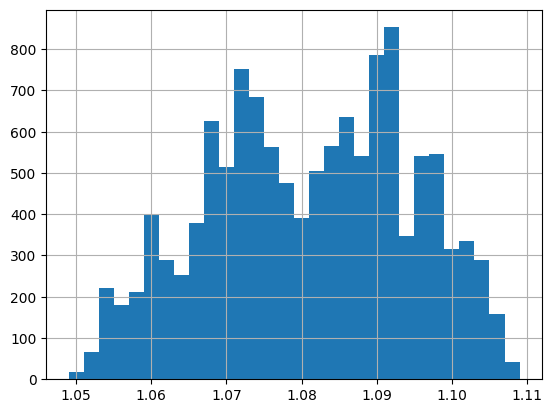

In [34]:
df.close.hist(bins=30)